<a href="https://colab.research.google.com/github/DianaBravoPerez/EDP-1/blob/main/prueba_defrecuencias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prueba de Frecuencias
### Simulación - Tarea 2

En esta tarea vamos a hacer la **Prueba de Frecuencias** para ver si los números pseudoaleatorios de la tarea anterior en verdad se comportan como números aleatorios.

La idea básica es: si los números son verdaderamente aleatorios y uniformes en [0,1), entonces deberían caer más o menos la misma cantidad de veces en cada subintervalo. Si hay muchos en un lado y muy pocos en otro, algo raro está pasando.

Para esto usamos la **prueba Chi-Cuadrada (χ²)**.

Las hipótesis son:
- **H₀:** Los números siguen una distribución uniforme → son "buenos" números aleatorios
- **H₁:** Los números NO siguen una distribución uniforme → algo está mal


## Paso 1: Importar las librerías que voy a usar

In [1]:
# Estas son las librerías que necesito para hacer los cálculos y las gráficas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats  # esta la uso para sacar el valor crítico de chi cuadrada

## Paso 2: Meter los datos de la tarea anterior

Aquí pongo los mismos 100 números pseudoaleatorios de la Tabla 3.1 que usamos en la tarea pasada.

In [2]:
# Los 100 números de la Tabla 3.1 (los mismos de la tarea anterior)
numeros = [
    0.78961, 0.05230, 0.10699, 0.55877, 0.14151,
    0.76086, 0.12079, 0.27738, 0.65726, 0.79269,
    0.80548, 0.82654, 0.29453, 0.20852, 0.42989,
    0.58518, 0.98611, 0.34488, 0.34358, 0.11537,
    0.89898, 0.57880, 0.67621, 0.05010, 0.00121,
    0.28269, 0.73059, 0.70119, 0.18284, 0.49962,
    0.38618, 0.76910, 0.68334, 0.55170, 0.10850,
    0.79982, 0.45679, 0.21631, 0.87616, 0.55743,
    0.58962, 0.33216, 0.03185, 0.61168, 0.09264,
    0.69623, 0.17028, 0.05475, 0.91512, 0.76262,
    0.29931, 0.30861, 0.83358, 0.51781, 0.03272,
    0.57410, 0.26593, 0.85903, 0.43308, 0.35286,
    0.24000, 0.65559, 0.38507, 0.90829, 0.94187,
    0.93655, 0.88809, 0.81772, 0.36982, 0.19904,
    0.54325, 0.62400, 0.09133, 0.41678, 0.33954,
    0.58244, 0.85853, 0.88752, 0.33729, 0.15506,
    0.23949, 0.53559, 0.33381, 0.49383, 0.75103,
    0.19962, 0.65002, 0.74579, 0.79113, 0.63453,
    0.19147, 0.40644, 0.08128, 0.73435, 0.22724,
    0.22287, 0.07281, 0.64183, 0.44267, 0.72102
]

# Lo convierto a array de numpy para que sea más fácil trabajar con él
numeros = np.array(numeros)

print(f"Cantidad de números: {len(numeros)}")
print(f"El más pequeño es: {numeros.min():.5f}")
print(f"El más grande es:  {numeros.max():.5f}")

Cantidad de números: 100
El más pequeño es: 0.00121
El más grande es:  0.98611


## Paso 3: Definir los parámetros de la prueba

Voy a dividir el intervalo [0, 1) en **5 subintervalos de ancho 0.2**, quedando así:

$$[0-0.2), \quad [0.2-0.4), \quad [0.4-0.6), \quad [0.6-0.8), \quad [0.8-1.0]$$

Como tengo **100 números** y **5 intervalos**, la frecuencia esperada en cada uno (si fueran perfectamente uniformes) sería:

$$f_e = \frac{N}{k} = \frac{100}{5} = 20$$

El **nivel de significancia** que uso es α = 0.05.

In [3]:
N     = len(numeros)   # 100 datos
k     = 5             # 5 subintervalos de ancho 0.2
alpha = 0.05          # nivel de significancia

fe = N / k            # frecuencia esperada en cada intervalo

print(f"Total de datos (N):              {N}")
print(f"Número de intervalos (k):        {k}")
print(f"Frecuencia esperada (fe = N/k):  {fe}")
print(f"Nivel de significancia (α):      {alpha}")

Total de datos (N):              100
Número de intervalos (k):        5
Frecuencia esperada (fe = N/k):  20.0
Nivel de significancia (α):      0.05


## Paso 4: Construir la tabla de frecuencias

Cuento cuántos números caen en cada subintervalo (**frecuencia observada, f₀**) y calculo el término de chi-cuadrada para cada uno:

$$\frac{(f_0 - f_e)^2}{f_0}$$

In [4]:
# Límites de los 5 subintervalos
limites = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

# Contar cuántos números caen en cada intervalo
f0, _ = np.histogram(numeros, bins=limites)

# Nombres de los intervalos
nombres = ["[0.0 - 0.2)", "[0.2 - 0.4)", "[0.4 - 0.6)", "[0.6 - 0.8)", "[0.8 - 1.0]"]

# Cálculo término por término: (f0 - fe)² / f0
termino = (f0 - fe) ** 2 / f0

# Armar la tabla
tabla = pd.DataFrame({
    "Intervalo":             nombres,
    "Frec. observada (f₀)": f0,
    "Frec. esperada (fₑ)":  [int(fe)] * k,
    "f₀ - fₑ":              f0 - fe,
    "(f₀ - fₑ)²":           (f0 - fe) ** 2,
    "(f₀ - fₑ)² / f₀":     termino.round(4)
})

print(tabla.to_string(index=False))
print(f"\n{'─'*60}")
print(f"  SUMA  χ² = Σ (f₀ - fₑ)² / f₀  =  {termino.sum():.4f}")
print(f"{'─'*60}")

  Intervalo  Frec. observada (f₀)  Frec. esperada (fₑ)  f₀ - fₑ  (f₀ - fₑ)²  (f₀ - fₑ)² / f₀
[0.0 - 0.2)                    21                   20      1.0         1.0           0.0476
[0.2 - 0.4)                    22                   20      2.0         4.0           0.1818
[0.4 - 0.6)                    19                   20     -1.0         1.0           0.0526
[0.6 - 0.8)                    23                   20      3.0         9.0           0.3913
[0.8 - 1.0]                    15                   20     -5.0        25.0           1.6667

────────────────────────────────────────────────────────────
  SUMA  χ² = Σ (f₀ - fₑ)² / f₀  =  2.3400
────────────────────────────────────────────────────────────


## Paso 5: Decisión

El estadístico calculado es:

$$\chi^2_{calc} = \sum_{i=1}^{k} \frac{(f_{0i} - f_{ei})^2}{f_{0i}}$$

Los **grados de libertad** son:

$$gl = k - 1 = 5 - 1 = 4$$

Comparo el valor calculado con el **valor crítico** $\chi^2_{\alpha,\, gl}$ de la tabla.

**Regla de decisión:**
- Si $\chi^2_{calc} \leq \chi^2_{crítico}$ → **No se rechaza H₀** ✓
- Si $\chi^2_{calc} > \chi^2_{crítico}$ → **Se rechaza H₀** ✗

In [5]:
# Estadístico calculado
chi2_calc = termino.sum()

# Grados de libertad
gl = k - 1  # = 4

# Valor crítico χ²(α=0.05, gl=4)
chi2_critico = stats.chi2.ppf(1 - alpha, df=gl)

# p-valor
p_valor = 1 - stats.chi2.cdf(chi2_calc, df=gl)

print("============================================")
print("            DECISIÓN FINAL")
print("============================================")
print(f"  χ² calculado   =  {chi2_calc:.4f}")
print(f"  χ² crítico     =  {chi2_critico:.4f}   (α=0.05, gl=4)")
print(f"  p-valor        =  {p_valor:.4f}")
print("--------------------------------------------")

if chi2_calc <= chi2_critico:
    print(f"  {chi2_calc:.4f}  ≤  {chi2_critico:.4f}")
    print()
    print("  → NO se rechaza H₀")
    print()
    print("  Los números pseudoaleatorios pasan la")
    print("  Prueba de Frecuencias. Se puede concluir")
    print("  que siguen una distribución uniforme")
    print("  U(0,1) con un nivel de significancia")
    print(f"  α = {alpha}.")
else:
    print(f"  {chi2_calc:.4f}  >  {chi2_critico:.4f}")
    print()
    print("  → Se rechaza H₀")
    print("  Los números NO siguen una distribución uniforme.")
print("============================================")

            DECISIÓN FINAL
  χ² calculado   =  2.3400
  χ² crítico     =  9.4877   (α=0.05, gl=4)
  p-valor        =  0.6735
--------------------------------------------
  2.3400  ≤  9.4877

  → NO se rechaza H₀

  Los números pseudoaleatorios pasan la
  Prueba de Frecuencias. Se puede concluir
  que siguen una distribución uniforme
  U(0,1) con un nivel de significancia
  α = 0.05.


## Paso 6: Gráficas

Hago dos gráficas para visualizar mejor los resultados:
1. Una de barras comparando lo observado vs lo esperado
2. La curva chi-cuadrada mostrando dónde cae mi valor calculado

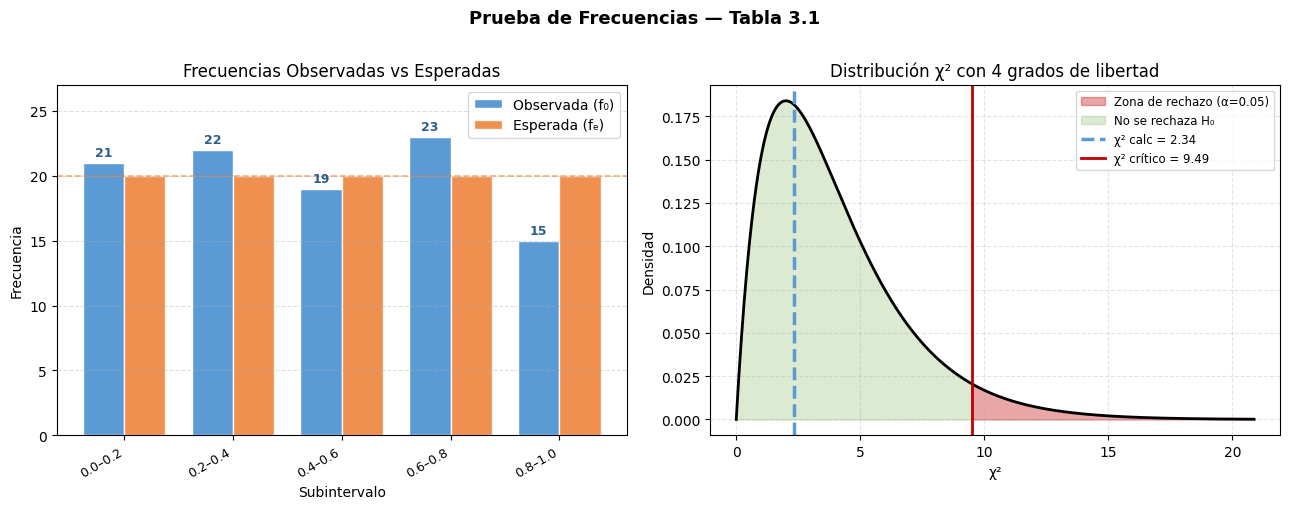

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
fig.suptitle('Prueba de Frecuencias — Tabla 3.1', fontsize=13, fontweight='bold', y=1.01)

# --- Gráfica 1: barras de frecuencias observadas vs esperadas ---
x = np.arange(k)
ancho = 0.38

ax1.bar(x - ancho/2, f0, ancho, label='Observada (f₀)', color='#5B9BD5', edgecolor='white')
ax1.bar(x + ancho/2, [fe]*k, ancho, label='Esperada (fₑ)', color='#ED7D31', edgecolor='white', alpha=0.85)

# línea horizontal en fe para que se vea más claro
ax1.axhline(y=fe, color='#ED7D31', linestyle='--', linewidth=1.2, alpha=0.6)

ax1.set_xticks(x)
ax1.set_xticklabels([f'{limites[i]:.1f}–{limites[i+1]:.1f}' for i in range(k)],
                    rotation=30, ha='right', fontsize=9)
ax1.set_ylabel('Frecuencia')
ax1.set_xlabel('Subintervalo')
ax1.set_title('Frecuencias Observadas vs Esperadas')
ax1.legend()
ax1.grid(axis='y', linestyle='--', alpha=0.4)
ax1.set_ylim(0, max(f0) + 4)

# anotar los valores encima de las barras observadas
for i, v in enumerate(f0):
    ax1.text(i - ancho/2, v + 0.3, str(v), ha='center', va='bottom', fontsize=9, color='#2E5D8E', fontweight='bold')

# --- Gráfica 2: distribución chi cuadrada con zona de rechazo ---
x_vals = np.linspace(0, chi2_critico * 2.2, 600)
y_vals = stats.chi2.pdf(x_vals, df=gl)

ax2.plot(x_vals, y_vals, 'k-', linewidth=2)

# zona de rechazo (en rojo)
x_rech = np.linspace(chi2_critico, chi2_critico * 2.2, 400)
ax2.fill_between(x_rech, stats.chi2.pdf(x_rech, df=gl),
                 color='#C00000', alpha=0.35, label=f'Zona de rechazo (α={alpha})')

# zona de no rechazo (en verde)
x_norech = np.linspace(0, chi2_critico, 400)
ax2.fill_between(x_norech, stats.chi2.pdf(x_norech, df=gl),
                 color='#70AD47', alpha=0.25, label='No se rechaza H₀')

# valor calculado
ax2.axvline(chi2_calc, color='#5B9BD5', linewidth=2.5,
            linestyle='--', label=f'χ² calc = {chi2_calc:.2f}')

# valor crítico
ax2.axvline(chi2_critico, color='#C00000', linewidth=2,
            linestyle='-', label=f'χ² crítico = {chi2_critico:.2f}')

ax2.set_xlabel('χ²')
ax2.set_ylabel('Densidad')
ax2.set_title(f'Distribución χ² con {gl} grados de libertad')
ax2.legend(fontsize=8.5)
ax2.grid(linestyle='--', alpha=0.35)

plt.tight_layout()
plt.show()

## Conclusión

El valor χ² que calculé fue **2.3400**, y el valor crítico para α = 0.05 con 4 grados de libertad es **9.4877**.

Como **2.3400 << 9.4877**, no se rechaza H₀. Los 100 números pseudoaleatorios de la Tabla 3.1 pasan la Prueba de Frecuencias y se pueden considerar uniformemente distribuidos en [0, 1).

En la gráfica se puede ver claramente que el valor calculado (línea azul) cae muy dentro de la zona verde, lejos de la región de rechazo. El p-valor de 0.6735 confirma que no hay evidencia suficiente para rechazar la hipótesis nula.